# Data from 2017 Physics Analysis survey. 
## Author: Sebastian Neubert @seneubert

### Result summary

- 49 analysis were published, out of that 16 returned data on their input data sizes. 
- We asked for ntuple size after stripping. Analyses could specify real data, MC and "other" samples, where other is for control channels and the like. All numbers are in GB or GBfb

- Total data size reported: 9458.9 GB
- Average per analysis: 591.1 GB
- Average scaled to 49 analyses published in 2017: 28968 GB
- Total reported normalized to luminosity (expect larger files from Run II!): 3358 GB fb
- Average normalized to lumi: 210 GB fb
- Average scaled to 49 analyses  published in 2017: 10284 Gb fb
- The benchmark that should be used to budget storage needed (with contingency): 11 TB fb per year


### Data

In [14]:
sData=[382,35,350,21.6,3970,249,180,400,230,20,6,208,219,13.6,26,5]
sMC=[5,6,10,22,515,1.6,110,224,110,6,15,1,37.5,0.5,3,10]
lumi=[4.5,1.3,1.6,2,3,3,2,3,3,3,3,3,3,3,3,1.6]
sOther=[1017,130,20,6.2,60,11.4,676,0,100,2,4,9,1.5,21,2,7]

### Plots 

In [18]:
# %load header
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'


In [39]:
a = [1, 2, 3, 4]
b = [str(ax) + "a" for ax in a]
print zip(a,b)
print b

[(1, '1a'), (2, '2a'), (3, '3a'), (4, '4a')]
['1a', '2a', '3a', '4a']


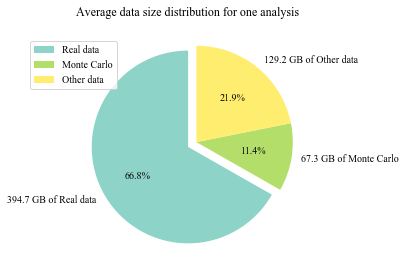

In [44]:
# average data size distribution per analysis
sData_avg = np.mean(sData)
sMC_avg = np.mean(sMC)
sOther_avg = np.mean(sOther)

size = np.around([sData_avg, sMC_avg, sOther_avg], decimals=1)
labels = [str(s)+" GB" for s in size]
real_labels = ['Real data', 'Monte Carlo', 'Other data']
full_label = [x +' of '+ y for x,y in zip(labels, real_labels)]
explode = (0.1, 0, 0)
colors = plt.cm.Set3(np.linspace(0,1,3))

fig, ax = plt.subplots()
pie = ax.pie(size, explode=explode, labels=full_label, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax.axis('equal')  
fig.suptitle('Average data size distribution for one analysis')
plt.legend(pie[0], real_labels, loc=0)
plt.show()

In [64]:
import pandas as pd
dframe = pd.DataFrame(
    {'data': sData,
     'mc': sMC,
     'other': sOther,
     'lumi': lumi
    })
nframe = dframe.groupby(['lumi'])['data', 'mc', 'other'].mean()
nframe

,data,mc,other
lumi,,,
1.3,35.00,6.00,130.00
1.6,177.50,10.00,13.50
2.0,100.80,66.00,341.10
3.0,534.16,91.36,21.09
4.5,382.00,5.00,1017.00


In [66]:
print nframe.index

Float64Index([1.3, 1.6, 2.0, 3.0, 4.5], dtype='float64', name=u'lumi')


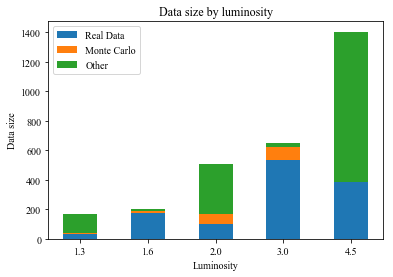

In [73]:
N = len(nframe.index)
ind = np.arange(N)
width = 0.50

p1 = plt.bar(ind, nframe['data'], width)
p2 = plt.bar(ind, nframe['mc'], width, bottom=nframe['data'])
p3 = plt.bar(ind, nframe['other'], width, bottom=nframe['data']+nframe['mc'])

plt.ylabel('Data size')
plt.title('Data size by luminosity')
plt.xlabel('Luminosity')
plt.xticks(ind, (nframe.index))
plt.legend((p1[0], p2[0], p3[0]), ('Real Data', 'Monte Carlo', 'Other'))

plt.show()

### Code

In [6]:
nanalyses=len(sData)
total=sum(sData)+sum(sMC)+sum(sOther)
print("Total data = {} GB".format(total))
average=total/nanalyses
print("Average = {} GB".format(average))
print("Total for 2017 publications = {} GB".format(average*49))

sDL=zip(sData,lumi)
sMCL=zip(sMC,lumi)
sOtherL=zip(sOther,lumi)
nData=[d[0]/d[1] for d in sDL]
nMC=[d[0]/d[1] for d in sMCL]
nOther=[d[0]/d[1] for d in sOtherL]
totalPerfb=sum(nData)+sum(nMC)+sum(nOther)
print("Total data / fb-1 = {} GB fb".format(totalPerfb))
averagePerfb=totalPerfb/nanalyses
print("Average data / fb-1 = {} GB fb".format(averagePerfb))
print("Total for 2017 publications = {} GB fb".format(averagePerfb*49))

Total data = 9458.9 GB
Average = 591.18125 GB
Total for 2017 publications = 28967.88125 GB
Total data / fb-1 = 3350.72179487 GB fb
Average data / fb-1 = 209.420112179 GB fb
Total for 2017 publications = 10261.5854968 GB fb
